<a href="https://colab.research.google.com/github/visionNoob/detectron2_aihub_tutorial/blob/master/Detectron2_AIHub_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 1: Detectron2 설치하기

In [0]:
# 종속 패키지(dependencies) 설치
!pip install -U torch torchvision cython
!pip install -U 'git+https://github.com/facebookresearch/fvcore.git' 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
torch.__version__

In [0]:
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo

Cloning into 'detectron2_repo'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 1757 (delta 2), reused 6 (delta 2), pack-reused 1728
Receiving objects: 100% (1757/1757), 1.72 MiB | 14.81 MiB/s, done.
Resolving deltas: 100% (1073/1073), done.
Obtaining file:///content/detectron2_repo
     |████████████████████████████████| 2.1MB 2.1MB/s 
     |████████████████████████████████| 61kB 8.2MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 4.3.0
    Uninstalling Pillow-4.3.0:
      Successfully uninstalled Pillow-4.3.0
  Found existing installation: tqdm 4.28.1
    Uninstalling tqdm-4.28.1:
      Successfully uninstalled tqdm-4.28.1
  Running setup.py develop for detectron2


In [0]:
# 인스톨이 완료되면 Colab Runtime을 다시 시작해주세요. 

# 기본 설정
# detectron2 logger 설정
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# 자주 사용하는 라이브러리 임폴트
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# 자주 사용하는 detectron2 유틸 임폴트 
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

# Chapter 2: 이미지에서 Pretrained Model(AIHUB 보행자 데이터셋) 사용해보기

임의의 이미지를 다운로드합니다.

--2019-12-12 15:38:42--  https://www.dropbox.com/s/7vcox0sy4cdasvg/sample1.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7vcox0sy4cdasvg/sample1.png [following]
--2019-12-12 15:38:42--  https://www.dropbox.com/s/raw/7vcox0sy4cdasvg/sample1.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucebabd54af0442e58b13ae38225.dl.dropboxusercontent.com/cd/0/inline/AuHIqupC78uxRuZin2no3966SN1k6sImNeM17Jj0tf831XYYqa2cb5oFOi_vkf-lYWISag2a0gs3jogE_IE4EDMJmn1hUhpL2DCwOYMGUX_OPDkgdt4FU7ukxQ4llvbWK4s/file# [following]
--2019-12-12 15:38:42--  https://ucebabd54af0442e58b13ae38225.dl.dropboxusercontent.com/cd/0/inline/AuHIqupC78uxRuZin2no3966SN1k6sImNeM17Jj0tf831XYYqa2cb5oFOi_vkf-lYWISag2a0gs3jogE_IE4EDMJmn1hUhpL2DCwOYMGUX_OPDkgdt4FU

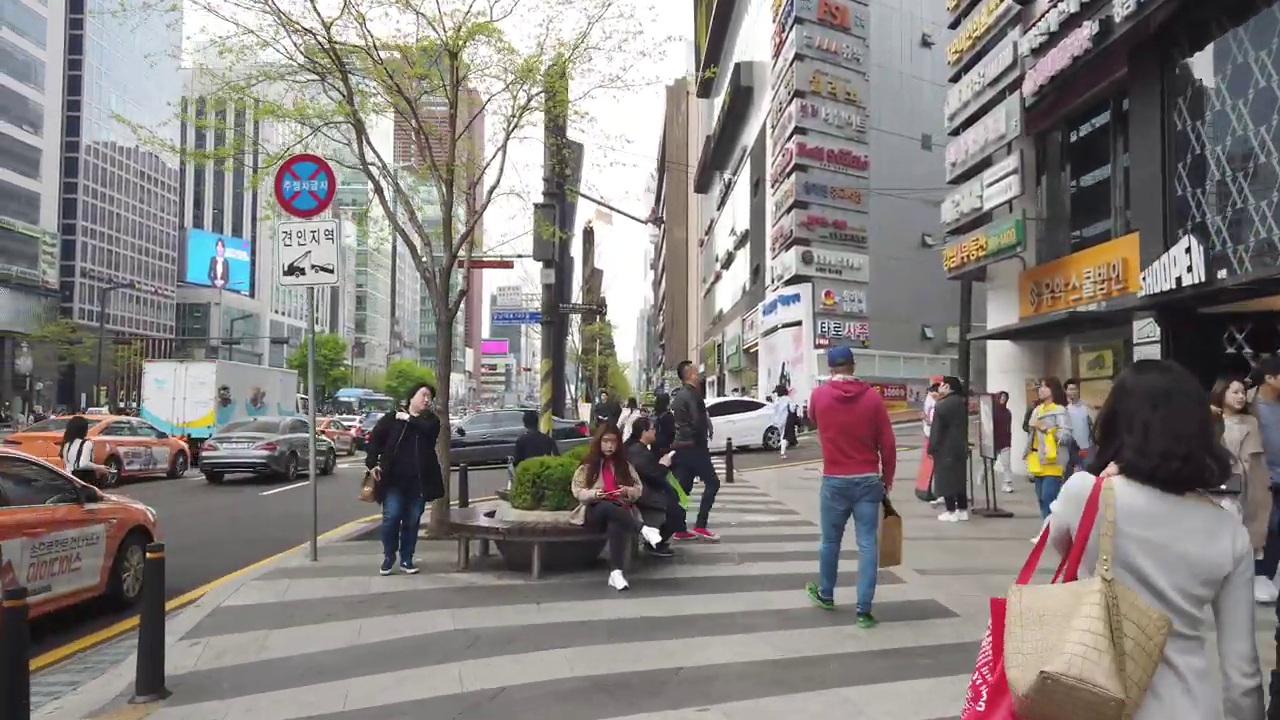

In [0]:
!wget 'https://www.dropbox.com/s/7vcox0sy4cdasvg/sample1.png' -O input.jpg
im = cv2.imread("./input.jpg")
cv2_imshow(im)

In [0]:
import hashlib

def getHash(filepath):
    """
    Check download files with origin files
        Parameters
        ----------
        filepath: 
            path of the file
        Returns
        ----------
        hash value:
            md5 hash value of the file
    """
    blocksize=65536
    with open(filepath, "rb") as file:
        hasher = hashlib.md5()
        buf = file.read(blocksize)
        while len(buf) > 0:
            hasher.update(buf)
            buf = file.read(blocksize)
        return hasher.hexdigest()


In [0]:
# pre-trained 모델을 다운로드 받습니다.
!wget 'https://www.dropbox.com/s/zuvj9qiuv5ntge9/retinanet_r_50_fpn_3x_aihub_final.pth' -O 'model_weight.pth'

hash_origin = 'a85be6dc76c0c40cdb6fcc807a8562f1'
hash_downloaded = getHash('./model_weight.pth')
if hash_downloaded != hash_origin:
    print('ERROR: ' + filepath + ' file is crashed')

print("model is downloaded!")

--2019-12-12 15:39:40--  https://www.dropbox.com/s/zuvj9qiuv5ntge9/retinanet_r_50_fpn_3x_aihub_final.pth
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/zuvj9qiuv5ntge9/retinanet_r_50_fpn_3x_aihub_final.pth [following]
--2019-12-12 15:39:40--  https://www.dropbox.com/s/raw/zuvj9qiuv5ntge9/retinanet_r_50_fpn_3x_aihub_final.pth
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc492d30e7d9d7687c8d499ea225.dl.dropboxusercontent.com/cd/0/inline/AuF47Y6ymXcGNRlKjy8KuVhfJ-ywCOjlKdtmQb3VF6nOayD83FclCLrjuobtwRPduOOI0lIN94fE1HlXasl2eQAw24MX8kAQpXdy-_uSIRaqixzrAFTN19ZHXUgmHv2Asm8/file# [following]
--2019-12-12 15:39:40--  https://uc492d30e7d9d7687c8d499ea225.dl.dropboxusercontent.com/cd/0/inline/AuF47Y6ymXcGNRlKjy8KuVhfJ-ywCOjlKdtmQb3

In [6]:
import csv 
!wget 'https://www.dropbox.com/s/byecey0zebrn203/aihub_13_classes_label.csv'
path = './aihub_13_classes_label.csv'

label_list = []
with open(path) as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        label_list.append(row[0])

def get_dummy_aihub_dicts():
    dataset_dicts = []
    return dataset_dicts

from detectron2.data import DatasetCatalog, MetadataCatalog
#DatasetCatalog.register("aihub/dummy", get_dummy_aihub_dicts)
MetadataCatalog.get('aihub/dummy').set(thing_classes=label_list)


--2019-12-12 15:41:21--  https://www.dropbox.com/s/byecey0zebrn203/aihub_13_classes_label.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/byecey0zebrn203/aihub_13_classes_label.csv [following]
--2019-12-12 15:41:22--  https://www.dropbox.com/s/raw/byecey0zebrn203/aihub_13_classes_label.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc736eeb67f94ee9c19ae516cd59.dl.dropboxusercontent.com/cd/0/inline/AuHvS56Kh3yl2zbClN7ua2WCb2WUxY2k1s5nL723ZlbLasjzG4qHKcEcMgOEflKUnxSYeAC2jABUNDXEP1LRbpftgvu4ZBiZVkXm3DwMTq_bua7rKPfyeOvX0DzGakNxPsE/file# [following]
--2019-12-12 15:41:22--  https://uc736eeb67f94ee9c19ae516cd59.dl.dropboxusercontent.com/cd/0/inline/AuHvS56Kh3yl2zbClN7ua2WCb2WUxY2k1s5nL723ZlbLasjzG4qHKcEcMgOEflKUnxSYeAC2

Metadata(name='aihub/dummy', thing_classes=['person', 'pole', 'bollard', 'tree_trunk', 'car', 'traffic_light', 'truck', 'bus', 'traffic_sign', 'motorcycle', 'movable_signage', 'potted_plant', 'wheelchair'])

In [7]:
cfg = get_cfg()
# 모델 및 RetinaNet 사용을 위한 config을 지정해줍니다. 
cfg.merge_from_file("./detectron2_repo/configs/COCO-Detection/retinanet_R_50_FPN_3x.yaml")
cfg.MODEL.RETINANET.SCORE_THRESH_TEST = 0.5
cfg.MODEL.RETINANET.NMS_THRESH_TEST = 0.2 
cfg.MODEL.WEIGHTS = './model_weight.pth'
cfg.NUM_CLASSES = 13

# 학습에 사용된 앵커 정보입니다. 
cfg.MODEL.ANCHOR_GENERATOR.ASPECT_RATIOS=[[0.65, 1.0, 2.47, 5.2, 18.12]]

cfg.DATASETS.TRAIN = ('aihub/dummy', )
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

Loading config ./detectron2_repo/configs/COCO-Detection/../Base-RetinaNet.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


WARNING [12/12 15:43:10 d2.config.compat]: Config './detectron2_repo/configs/COCO-Detection/retinanet_R_50_FPN_3x.yaml' has no VERSION. Assuming it to be compatible with latest v2.


In [8]:
# 출력 형식에 관한 자세한 내용은 아래 주소를 참고하세요.
# https://detectron2.readthedocs.io/tutorials/models.html#model-output-format
outputs["instances"].pred_classes
outputs["instances"].pred_boxes

Boxes(tensor([[8.0231e+02, 3.3657e+02, 8.9932e+02, 6.2499e+02],
        [1.9755e+02, 4.1581e+02, 3.3238e+02, 4.8131e+02],
        [3.6962e+02, 3.7874e+02, 4.4538e+02, 5.7834e+02],
        [1.2953e+02, 5.4091e+02, 1.7011e+02, 7.0208e+02],
        [6.5921e+02, 3.5441e+02, 7.2097e+02, 5.4325e+02],
        [2.4307e+01, 4.1057e+02, 1.9727e+02, 4.7846e+02],
        [5.6907e+02, 4.1400e+02, 6.4956e+02, 5.9065e+02],
        [2.7320e+02, 2.1877e+02, 3.4371e+02, 2.8709e+02],
        [2.7060e+02, 1.5341e+02, 3.3723e+02, 2.1777e+02],
        [9.2380e+02, 3.7467e+02, 9.7321e+02, 5.2150e+02],
        [1.0540e+03, 3.3729e+02, 1.2644e+03, 7.1350e+02],
        [0.0000e+00, 4.4578e+02, 1.6323e+02, 6.4061e+02],
        [6.5176e+02, 3.9514e+02, 8.0135e+02, 4.5219e+02],
        [9.8036e+02, 3.8553e+02, 1.0148e+03, 5.0954e+02],
        [1.0249e+03, 3.7383e+02, 1.0845e+03, 5.4198e+02],
        [1.0287e+00, 5.7853e+02, 3.0547e+01, 7.1897e+02],
        [5.6922e+01, 4.1187e+02, 1.0176e+02, 5.2940e+02],
        

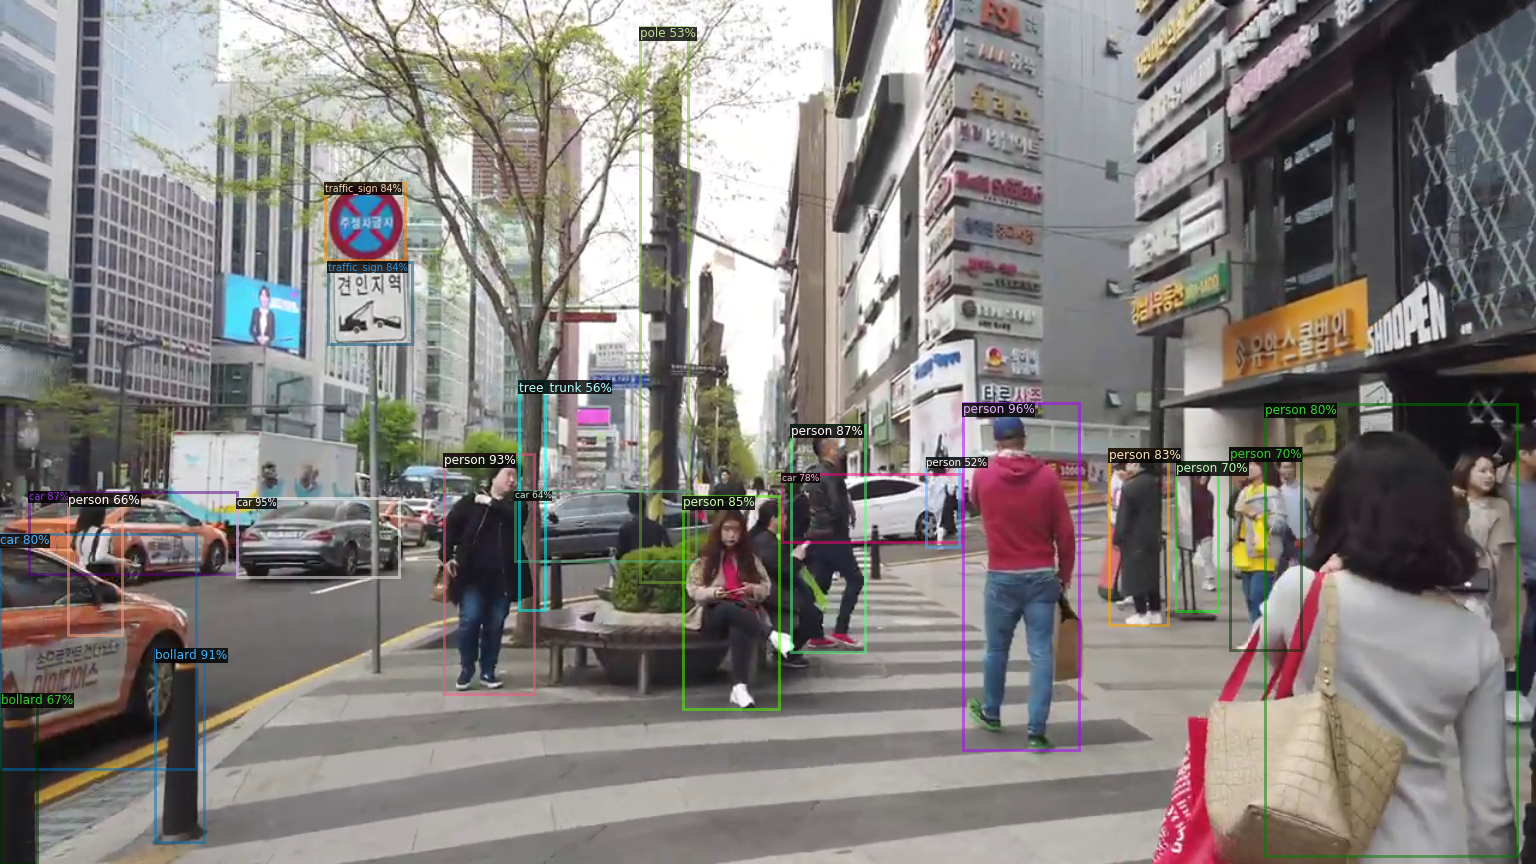

In [9]:
# `Visualizer`를 이용하면 예측 결과를 손쉽게 그릴 수 있습니다.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])